In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

# Feature Selection and Engineering

Today we will learn more about the tools for transforming variables in our dataset. When using simple models, such as Linear Regressions, we must invest a lot of time considering the **morphological** shape of relations in our data: not all of them are linear!

Furthermore, models are sensitive to **collinearity** between features: the more correlated two input features are, the more they can damage our estimated models.

Even when using advanced ML Algorithms, variable transformations can ensure better model performance.

In [3]:
url = 'https://raw.githubusercontent.com/pedroteche-ih/DAFT_MEX_202209/main/data/tb_ames_housing.csv'
tb_housing = pd.read_csv(url)

In [4]:
tb_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
tb_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


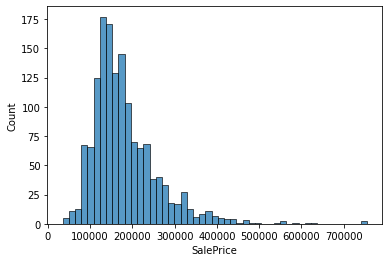

In [6]:
sns.histplot(data = tb_housing, x = 'SalePrice')

In [13]:
tb_housing.select_dtypes(include = 'number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
rel_num_var = tb_housing.select_dtypes(include = 'number').columns[np.abs(tb_housing.corr()['SalePrice']) > 0.3]

In [18]:
tb_housing[rel_num_var].corr()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotFrontage,1.000000,0.251646,0.123349,0.088866,0.193458,0.233633,0.392075,0.457181,0.080177,0.402797,0.198769,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.351799
OverallQual,0.251646,1.000000,0.572323,0.550684,0.411876,0.239666,0.537808,0.476224,0.295493,0.593007,0.550600,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,0.790982
YearBuilt,0.123349,0.572323,1.000000,0.592855,0.315707,0.249503,0.391452,0.281986,0.010308,0.199010,0.468271,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,0.522897
YearRemodAdd,0.088866,0.550684,0.592855,1.000000,0.179618,0.128451,0.291066,0.240379,0.140024,0.287389,0.439046,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,0.507101
MasVnrArea,0.193458,0.411876,0.315707,0.179618,1.000000,0.264736,0.363936,0.344501,0.174561,0.390857,0.276833,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,0.477493
BsmtFinSF1,0.233633,0.239666,0.249503,0.128451,0.264736,1.000000,0.522396,0.445863,-0.137079,0.208171,0.058543,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,0.386420
TotalBsmtSF,0.392075,0.537808,0.391452,0.291066,0.363936,0.522396,1.000000,0.819530,-0.174512,0.454868,0.323722,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,0.613581
1stFlrSF,0.457181,0.476224,0.281986,0.240379,0.344501,0.445863,0.819530,1.000000,-0.202646,0.566024,0.380637,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,0.605852
2ndFlrSF,0.080177,0.295493,0.010308,0.140024,0.174561,-0.137079,-0.174512,-0.202646,1.000000,0.687501,0.421378,0.616423,0.194561,0.070832,0.183926,0.138347,0.092165,0.208026,0.319334
GrLivArea,0.402797,0.593007,0.199010,0.287389,0.390857,0.208171,0.454868,0.566024,0.687501,1.000000,0.630012,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.708624


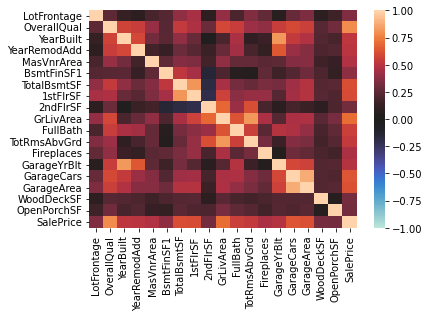

In [20]:
sns.heatmap(tb_housing[rel_num_var].corr(), vmin = -1, vmax = 1, center = 0)

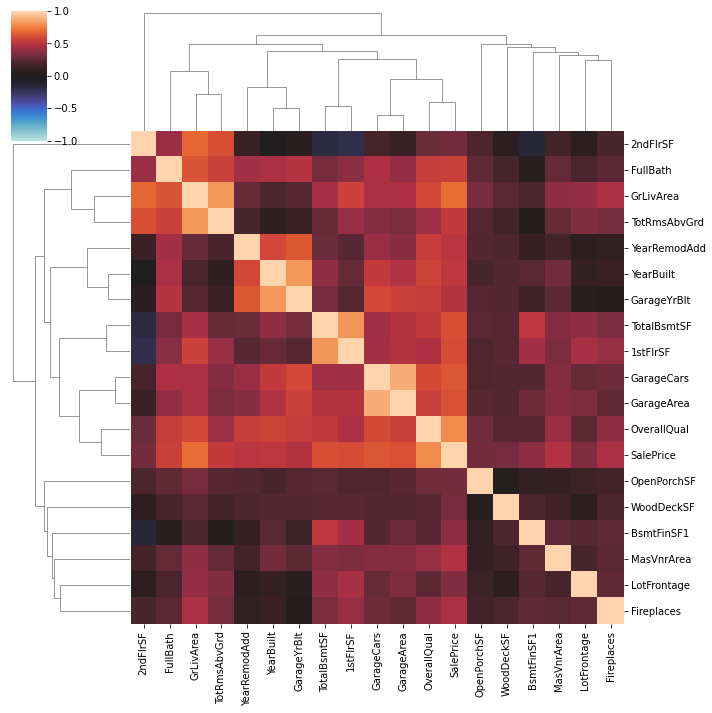

In [21]:
sns.clustermap(tb_housing[rel_num_var].corr(), vmin = -1, vmax = 1, center = 0)

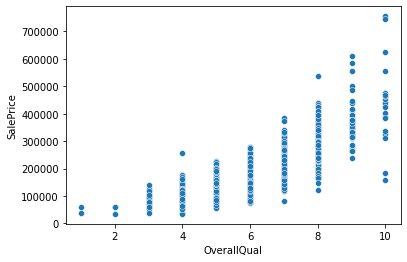

In [22]:
sns.scatterplot(data = tb_housing, x = 'OverallQual', y = 'SalePrice')

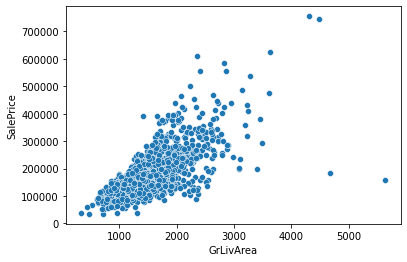

In [23]:
sns.scatterplot(data = tb_housing, x = 'GrLivArea', y = 'SalePrice')

# Feature Creation

One of the key ideas behind feature engineering is creating new variables by combining and transforming our existing variables.

## Numerical Transformation

In [24]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [ ]:
sns.scatterplot(data = tb_housing, x = 'GrLivArea', y = 'SalePrice')

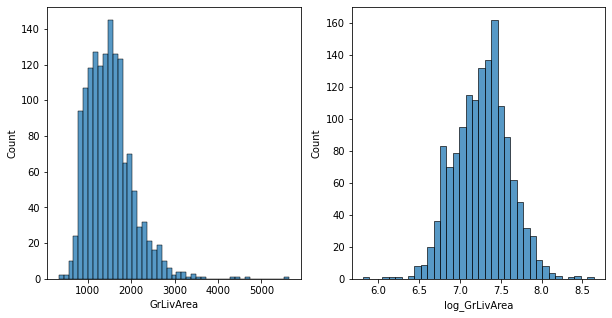

In [26]:
# IMPORTANT FOR X > 0
tb_housing['log_GrLivArea'] = np.log(tb_housing['GrLivArea'])
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(data = tb_housing, x = 'GrLivArea', ax = ax[0])
sns.histplot(data = tb_housing, x = 'log_GrLivArea', ax = ax[1])

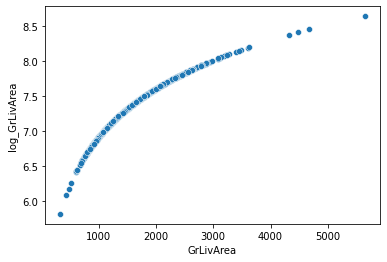

In [27]:
sns.scatterplot(data = tb_housing, x = 'GrLivArea', y = 'log_GrLivArea')

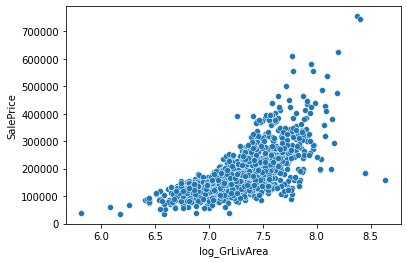

In [28]:
sns.scatterplot(data = tb_housing, x = 'log_GrLivArea', y = 'SalePrice')

In [31]:
pwe_livarea = PowerTransformer()
tb_housing['pwe_GrLivArea'] = pwe_livarea.fit_transform(tb_housing[['GrLivArea']])

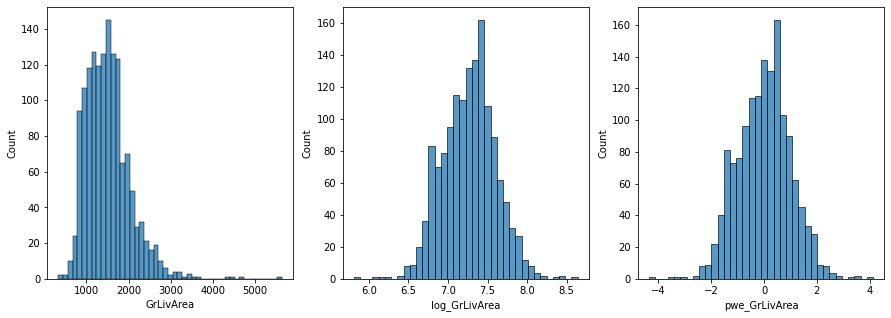

In [32]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.histplot(data = tb_housing, x = 'GrLivArea', ax = ax[0])
sns.histplot(data = tb_housing, x = 'log_GrLivArea', ax = ax[1])
sns.histplot(data = tb_housing, x = 'pwe_GrLivArea', ax = ax[2])

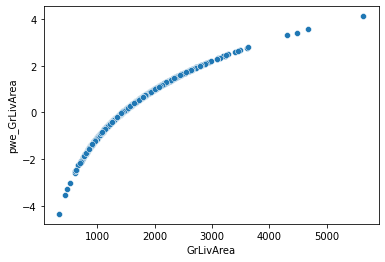

In [33]:
sns.scatterplot(data = tb_housing, y = 'pwe_GrLivArea',  x= 'GrLivArea')

## Target Variable Transformation

In [34]:
tb_housing['log_SalePrice'] = np.log(tb_housing['SalePrice'])

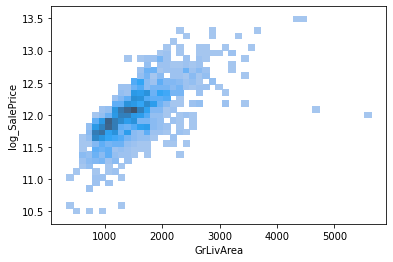

In [43]:
sns.histplot(data = tb_housing, x = 'GrLivArea', y = 'log_SalePrice')

In [39]:
np.log(10)

2.302585092994046

In [40]:
np.exp(2.302585092994046)

10.000000000000002

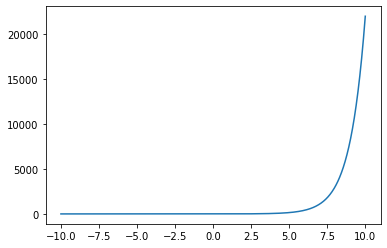

In [38]:
x = np.linspace(-10, 10, 1000)
y = np.exp(x)
plt.plot(x,y)

## Categorical Transformation

In [44]:
from pandas import qcut, cut
from sklearn.preprocessing import KBinsDiscretizer

In [47]:
tb_housing['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [55]:
heatingqc_group = {'Ex' : 'Good', 'Gd' : 'Good', 'TA' : 'Bad', 'Fa' : 'Bad', 'Po' : 'Bad'}

In [56]:
heatingqc_group

{'Ex': 'Good', 'Gd': 'Good', 'TA': 'Bad', 'Fa': 'Bad', 'Po': 'Bad'}

In [57]:
tb_housing['grp_HeatingQC'] = tb_housing['HeatingQC'].map(heatingqc_group)

In [58]:
tb_housing['grp_HeatingQC'].value_counts()

Good    982
Bad     478
Name: grp_HeatingQC, dtype: int64

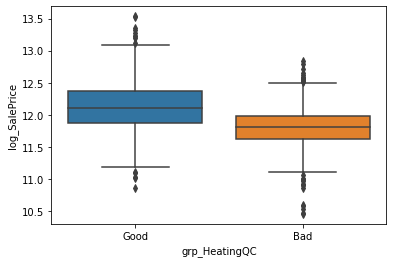

In [61]:
sns.boxplot(data = tb_housing, y = 'log_SalePrice', x = 'grp_HeatingQC')

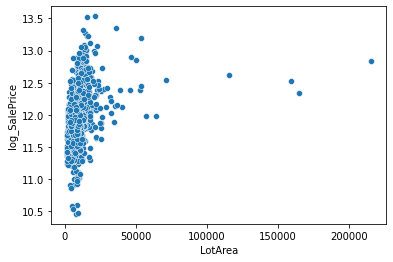

In [63]:
sns.scatterplot(data = tb_housing, x = 'LotArea', y = 'log_SalePrice')

In [69]:
tb_housing['grp_LotArea'] = pd.qcut(tb_housing['LotArea'], 4)

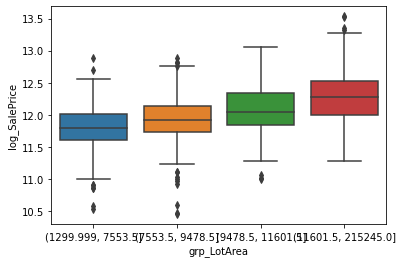

In [70]:
sns.boxplot(data = tb_housing, y = 'log_SalePrice', x = 'grp_LotArea')

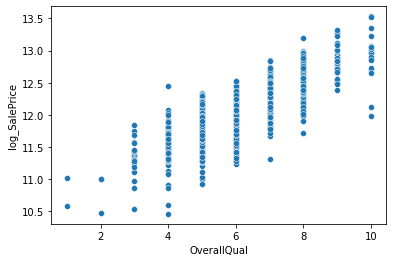

In [73]:
sns.scatterplot(data = tb_housing, x = 'OverallQual', y = 'log_SalePrice')

In [79]:
tb_housing['grp_OverallQual'] = pd.cut(tb_housing['OverallQual'], bins = [0, 6, 9, 11], include_lowest = True, 
                                       labels = ['Detractor', 'Neutral', 'Promoter'])

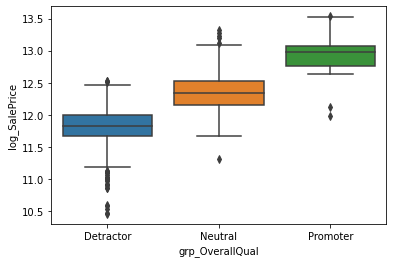

In [80]:
sns.boxplot(data = tb_housing, y = 'log_SalePrice', x = 'grp_OverallQual')

# Feature Combination

## Interaction between Categorical and Continous Variables

In [82]:
dummies_lotarea = pd.get_dummies(tb_housing['grp_LotArea'])
dummies_lotarea.columns = ['lot_A', 'lot_B', 'lot_C', 'lot_D']
dummies_lotarea.head()

,lot_A,lot_B,lot_C,lot_D
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [ ]:
tb_housing_dummies = pd.concat([tb_housing, dummies_lotarea], axis = 1)

In [85]:
tb_housing_dummies['int_lotA_LotArea'] = tb_housing_dummies['lot_A'] * tb_housing_dummies['LotArea']
tb_housing_dummies['int_lotB_LotArea'] = tb_housing_dummies['lot_B'] * tb_housing_dummies['LotArea']
tb_housing_dummies['int_lotC_LotArea'] = tb_housing_dummies['lot_C'] * tb_housing_dummies['LotArea']
tb_housing_dummies['int_lotD_LotArea'] = tb_housing_dummies['lot_D'] * tb_housing_dummies['LotArea']

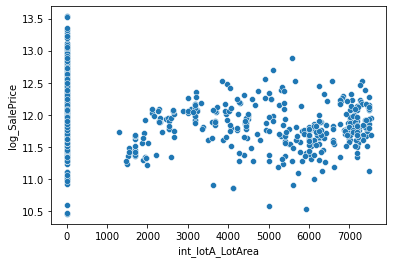

In [108]:
sns.scatterplot(data = tb_housing_dummies, x = 'int_lotA_LotArea', y = 'log_SalePrice')

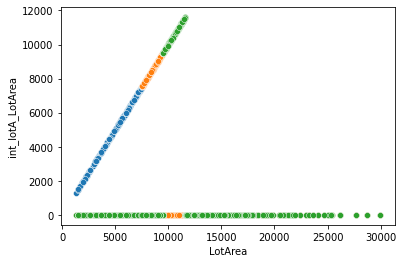

In [105]:
sns.scatterplot(data = tb_housing_dummies[tb_housing_dummies['LotArea'] < 30000], y = 'int_lotA_LotArea', x = 'LotArea')
sns.scatterplot(data = tb_housing_dummies[tb_housing_dummies['LotArea'] < 30000], y = 'int_lotB_LotArea', x = 'LotArea')
sns.scatterplot(data = tb_housing_dummies[tb_housing_dummies['LotArea'] < 30000], y = 'int_lotC_LotArea', x = 'LotArea')

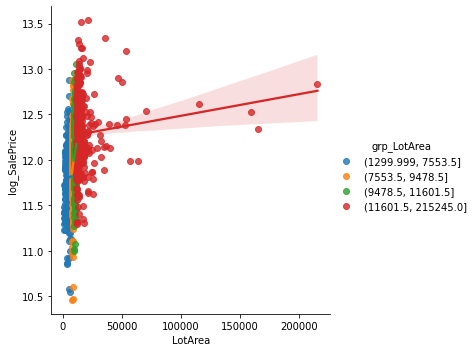

In [116]:
sns.lmplot(data = tb_housing_dummies[tb_housing_dummies['LotArea'] < 30000], 
           x = 'LotArea', y = 'log_SalePrice', hue = 'grp_LotArea')

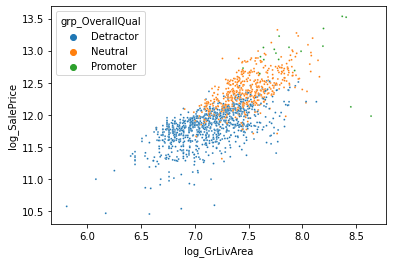

In [114]:
sns.scatterplot(data = tb_housing_dummies, x = 'log_GrLivArea', y = 'log_SalePrice', hue = 'grp_OverallQual', s = 3.5)

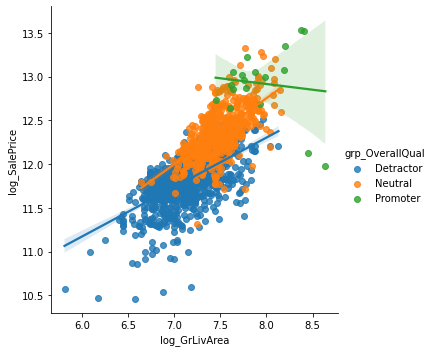

In [115]:
sns.lmplot(data = tb_housing_dummies, x = 'log_GrLivArea', y = 'log_SalePrice', hue = 'grp_OverallQual')

## Interaction between Continous Variables

In [118]:
tb_housing_dummies['lot_ocuppation'] = tb_housing_dummies['GrLivArea']/tb_housing_dummies['LotArea']

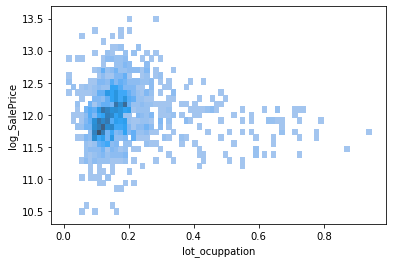

In [120]:
sns.histplot(data = tb_housing_dummies, x = 'lot_ocuppation', y ='log_SalePrice')

## Interaction between Categorical Variables

# Feature Selection

## Manual Selection

## Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA, NMF

## RFE & Lasso Regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV

# Creating a Wrapper